L'efficienza complessiva di scintillazione col filtro a gradino è di 0.0004.
Quella dovuta solo alla trasmittanza e alla pde è $0.26$, mentre quella dovuta al solo filtro è di $0.001$
Ora, generiamo i fotoni casuali con l'efficienza senza filtro:

In [130]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import ROOT
import random

## BGO

I primi due valori più frequenti sono: [0.0, 869.9753371311949]


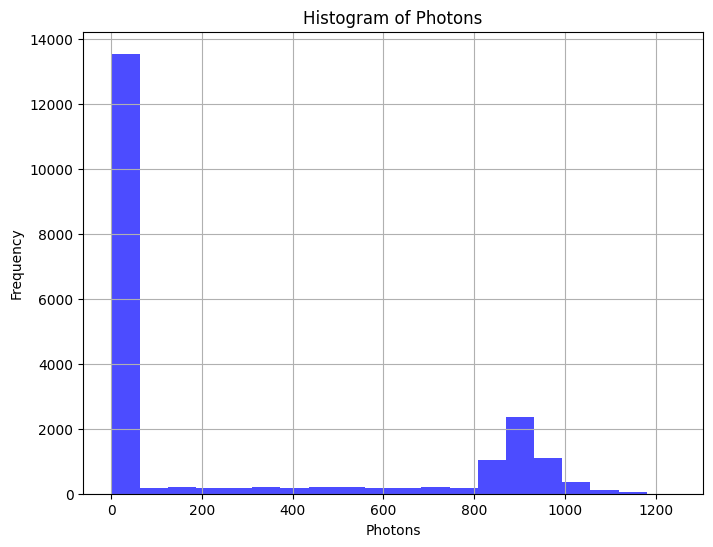

('Numero totale dei raggi',
 979200,
 'Numero di intersezioni rivelatori di trigger: ',
 240577,
 'Numero di intersezioni rivelatori di misura: ',
 85479,
 'Percentuale trigger/tot',
 24.5687295751634,
 'Percentuale measure/tot',
 8.729473039215687,
 'Accettanza geometrica',
 35.53082796776084,
 ' % Numero 1: ',
 61.76604780121433,
 ' % Numero 2: ',
 13.16814656231355,
 ' % Numero 3: ',
 13.210262169655703,
 ' % Numero 4: ',
 5.942980147170649,
 ' % Numero 5: ',
 5.912563319645761,
 'Energia rilasciata per muone',
 array([0., 0., 0., ..., 0., 0., 0.]),
 'MeV',
 'Lunghezza percorsa',
 array([0., 0., 0., ..., 0., 0., 0.]),
 'Fotoni attesi per muone',
 array([0., 0., 0., ..., 0., 0., 0.]),
 'Primi 10 dati',
 52      382.440344
 53      872.033717
 59      880.042370
 68      879.880912
 107     947.712116
 114    1157.779897
 119     927.245759
 133     497.950562
 140     874.246087
 149     882.723219
 Name: photons, dtype: float64)

In [131]:
%run ./Classe_2verticali_Efficienze.ipynb
a_t1 = 0.051 #m
b_t1 = 0.051
a_t2 = 0.052
b_t2 = 0.048
h_t = 0.054 
a_m = 0.05
b_m = 0.012
h_m = 0.012
detector_height = 0.001
total_time_hours = 240
density = 7130 #kg/m^3
muon_energy = 0.15 #MeV m^2 / kg
light_yield = 8200 #ph/MeV 
detection_eff = 0.26
geometric_eff = 0.0625 * 0.5

rivelatori = Rivelatori(a_t1, b_t1,a_t2, b_t2, h_t, a_m, b_m, h_m, detector_height, total_time_hours, density, muon_energy, light_yield, detection_eff, geometric_eff)

released_energy, photons, d_m, muon_df  = rivelatori.run(total_time_hours, get_dataframe=True, plot_graphs=True, plot_log_histogram=False)
released_energy, photons, d_m, muon_df = rivelatori.count_photons()

rivelatori.plot_rays(graph_rays = False)
rivelatori.plot_trigger(graph_trigger = False)
rivelatori.plot_measure(graph_measure = False)

Applichiamoci la poisson e la landau e otteniamo la distribuzione di fotoni

In [132]:

%jsroot on

photons_list = (muon_df.query('measure'))['photons']
landau_list = []
nmax =0

hist_poisson_BGO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 1500)
hist_landau_BGO = ROOT.TH1D("landau_hist", "Landau", 100, 0, 1500)

for elemento in photons_list:
    
    n_poisson_BGO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_BGO.Fill(n_poisson_BGO)
    
    landau = ROOT.TF1("landau", "landau", 0, 500)
    v = (0.25) * n_poisson_BGO
    landau.SetParameters(1, v , 15)
    landau_list.append(landau)

hist_random_points = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 500)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points.Fill(random_point)


c = ROOT.TCanvas("c")
hist_random_points.SetFillColor(ROOT.kBlue) 
hist_random_points.SetTitle("Convoluzione simulata (BGO)")
hist_random_points.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [133]:
#fotoni
photons_list = (muon_df.query('measure'))['photons']
landau_list = []
photons = []
nmax =0

hist_poisson_BGO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 1500)
hist_landau_BGO = ROOT.TH1D("landau_hist", "Landau", 100, 0, 1500)

for elemento in photons_list:
    n_poisson_BGO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_BGO.Fill(n_poisson_BGO)
    
    landau = ROOT.TF1("landau", "landau", 0, 500)
    v = (0.25) * n_poisson_BGO
    landau.SetParameters(1, v , 15)
    landau_list.append(landau)

hist_random_points_fotoni = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 2000)


for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points_fotoni.Fill(random_point / 0.25)
        photons.append(random_point / 0.25)
    
        
c = ROOT.TCanvas("c")
hist_random_points_fotoni.SetFillColor(ROOT.kBlue) 
hist_random_points_fotoni.SetTitle("Distribuzione Fotoni (BGO)")
hist_random_points_fotoni.GetXaxis().SetTitle("Valori simulati BGO")
hist_random_points_fotoni.Draw()

c.Draw()

mean = hist_random_points_fotoni.GetMean()

Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [134]:
from scipy.stats import binom


eff_filtro = 0.018
n_muons = 1000
n_photons = []
for value in photons:
    photons_int = int(value)
    n_photons.append(photons_int)

n_photons_filtro = []

for value in n_photons:
    if value > 0:
        r = binom.rvs(value, eff_filtro)
        n_photons_filtro.append(r)
    else:
        r = 0
        n_photons_filtro.append(r)

In [139]:
hist = ROOT.TH1F("Distribuzione Fotoni (BGO)", "Distribuzione Fotoni (BGO)", 20, 0, 50)
for value in n_photons_filtro:
    hist.Fill(value)
canvas = ROOT.TCanvas("canvas", "Istogramma")

hist.Draw()
hist.SetFillColor(ROOT.kBlue)
canvas.Draw()

mean = hist.GetMean()

Warning in <TROOT::Append>: Replacing existing TH1: Distribuzione Fotoni (BGO) (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [140]:
area_tot = hist.Integral(0, hist.GetNbinsX() + 1)
alpha = 0.05
x_cut = 0 

while x_cut <= 50:  
    area_from_x_cut = hist.Integral(hist.FindBin(x_cut), hist.GetNbinsX() + 1)

    if area_from_x_cut / area_tot <= alpha:
        break
    x_cut += 1  

print(f"x_cut: {x_cut}")
print("#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov", (x_cut - mean) )

x_cut: 30
#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov 13.963653689082495


In [141]:
Ch_medi = 2.36
x_obs = mean + Ch_medi
area = hist.Integral(hist.FindBin(x_obs), hist.GetNbinsX() + 1)
p_value = area / area_tot
print(f"p - value: {p_value}")

p - value: 0.42017149857084524


In [142]:
#filtro a 380
from scipy.stats import binom


eff_filtro = 0.006
n_muons = 1000
n_photons = []
for value in photons:
    photons_int = int(value)
    n_photons.append(photons_int)

n_photons_filtro = []

for value in n_photons:
    if value > 0:
        r = binom.rvs(value, eff_filtro)
        n_photons_filtro.append(r)
    else:
        r = 0
        n_photons_filtro.append(r)

hist = ROOT.TH1F("Distribuzione Fotoni (BGO)", "Distribuzione Fotoni (BGO)", 20, 0, 50)
for value in n_photons_filtro:
    hist.Fill(value)
canvas = ROOT.TCanvas("canvas", "Istogramma")

hist.Draw()
hist.SetFillColor(ROOT.kBlue)
canvas.Draw()

mean = hist.GetMean()

area_tot = hist.Integral(0, hist.GetNbinsX() + 1)
alpha = 0.05
x_cut = 0 

while x_cut <= 50:  
    area_from_x_cut = hist.Integral(hist.FindBin(x_cut), hist.GetNbinsX() + 1)

    if area_from_x_cut / area_tot <= alpha:
        break
    x_cut += 1  

print(f"x_cut: {x_cut}")
print("#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov", (x_cut - mean) )
Ch_medi = 1.1
x_obs = mean + Ch_medi
area = hist.Integral(hist.FindBin(x_obs), hist.GetNbinsX() + 1)
p_value = area / area_tot
print(f"p - value: {p_value}")

x_cut: 13
#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov 7.6291003130529464
p - value: 0.5825507009663808


Warning in <TROOT::Append>: Replacing existing TH1: Distribuzione Fotoni (BGO) (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


## PWO

L'efficienza complessiva di scintillazione col filtro a gradino è di 0.002.
Quella dovuta solo alla trasmittanza e alla pde è $0.339$, mentre quella dovuta al solo filtro è di $0.007$
Ora, generiamo i fotoni casuali con l'efficienza senza filtro:

I primi due valori più frequenti sono: [0.0, 22.552345444480924]


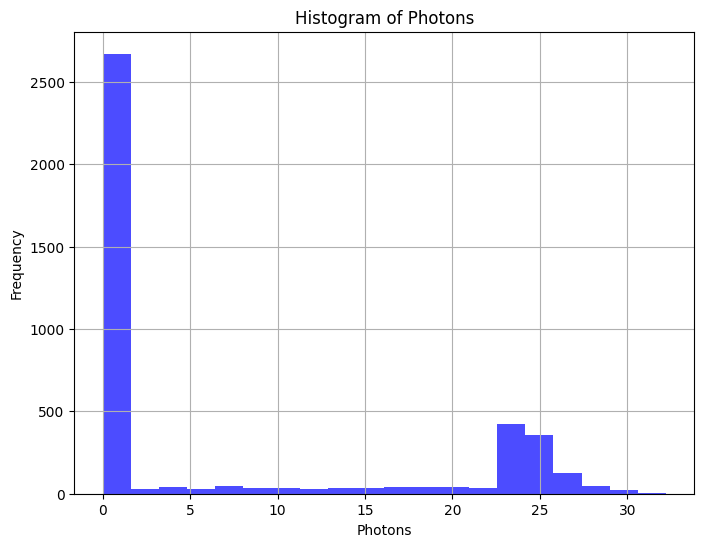

('Numero totale dei raggi',
 195840,
 'Numero di intersezioni rivelatori di trigger: ',
 48086,
 'Numero di intersezioni rivelatori di misura: ',
 16932,
 'Percentuale trigger/tot',
 24.553717320261438,
 'Percentuale measure/tot',
 8.645833333333334,
 'Accettanza geometrica',
 35.211911991016095,
 ' % Numero 1: ',
 61.7942357665958,
 ' % Numero 2: ',
 12.84549964564139,
 ' % Numero 3: ',
 13.471533191589888,
 ' % Numero 4: ',
 6.0122844318450275,
 ' % Numero 5: ',
 5.8764469643279,
 'Energia rilasciata per muone',
 array([0., 0., 0., ..., 0., 0., 0.]),
 'MeV',
 'Lunghezza percorsa',
 array([0., 0., 0., ..., 0., 0., 0.]),
 'Fotoni attesi per muone',
 array([0., 0., 0., ..., 0., 0., 0.]),
 'Primi 10 dati',
 5     25.190671
 12    24.440140
 16    24.247738
 21    25.013984
 30    23.920399
 37    23.857010
 38     4.887027
 43    23.549414
 50    27.484984
 77    23.501104
 Name: photons, dtype: float64)

In [143]:
%run ./Classe_2verticali_Efficienze.ipynb

a_t1 = 0.051 #m
b_t1 = 0.051
a_t2 = 0.052
b_t2 = 0.048
h_t = 0.054 
a_m = 0.05
b_m = 0.012
h_m = 0.012
detector_height = 0.001
total_time_hours = 48
density = 8280 #kg/m^3
muon_energy = 0.15 #MeV m^2 / kg
light_yield = 190 #ph/MeV 
detection_eff = 0.26
geometric_eff = 0.0625 * 0.5

rivelatori = Rivelatori(a_t1, b_t1,a_t2, b_t2, h_t, a_m, b_m, h_m, detector_height, total_time_hours, density, muon_energy, light_yield, detection_eff, geometric_eff)

released_energy, photons, d_m, muon_df  = rivelatori.run(total_time_hours, get_dataframe=True, plot_graphs=True, plot_log_histogram=False)
released_energy, photons, d_m, muon_df = rivelatori.count_photons()

rivelatori.plot_rays(graph_rays = False)
rivelatori.plot_trigger(graph_trigger = False)
rivelatori.plot_measure(graph_measure = False)

In [144]:
photons_list = (muon_df.query('measure'))['photons']
landau_list = []
nmax =0

hist_poisson_PWO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 10)
hist_landau_PWO = ROOT.TH1D("landau_hist", "Landau", 100, 0,10)

for elemento in photons_list:
    
    n_poisson_PWO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_PWO.Fill(n_poisson_PWO)
    
    landau = ROOT.TF1("landau", "landau", 0, 30)
    v = (0.25)* elemento
    landau.SetParameters(1, v , 0.6)
    landau_list.append(landau)

hist_random_points = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 25)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points.Fill(random_point)


c = ROOT.TCanvas("c")
hist_random_points.SetFillColor(ROOT.kBlue) 
hist_random_points.SetTitle("Convoluzione simulata (PWO)")
hist_random_points.Draw()
c.Draw()
bin_with_max_frequency = hist_random_points.GetMaximumBin()
mean = hist_random_points.GetXaxis().GetBinCenter(bin_with_max_frequency)
print(f"Valore medio (punto con la frequenza maggiore): {mean}")

Valore medio (punto con la frequenza maggiore): 5.875


Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [145]:
photons_list = (muon_df.query('measure'))['photons']
landau_list = []
nmax =0
photons = []

hist_poisson_BGO = ROOT.TH1D("poisson_hist", "Distribuzione di Poisson", 100, 0, 10)
hist_landau_BGO = ROOT.TH1D("landau_hist", "Landau", 100, 0, 10)

for elemento in photons_list:
    n_poisson_BGO = ROOT.gRandom.Poisson(elemento) 
    hist_poisson_BGO.Fill(n_poisson_BGO)
    
    landau = ROOT.TF1("landau", "landau", 0, 30)
    v = (0.25) * n_poisson_BGO
    landau.SetParameters(1, v , 0.6)
    landau_list.append(landau)

hist_random_points_fotoni = ROOT.TH1F("hist_random_points", "Random Points", 100, 0, 100)

for landau in landau_list:
    for _ in range(1):  
        random_point = landau.GetRandom()
        hist_random_points_fotoni.Fill(random_point / 0.25)
        photons.append(random_point / 0.25)


c = ROOT.TCanvas("c")
hist_random_points_fotoni.SetFillColor(ROOT.kBlue) 
hist_random_points_fotoni.SetTitle("Distribuzione Fotoni (PWO)")
hist_random_points_fotoni.GetXaxis().SetTitle("Valori simulati PWO")
hist_random_points_fotoni.Draw()

c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: poisson_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: landau_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_random_points (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [146]:
eff_filtro = 0.100


n_photons = []
for value in photons:
    photons_int = int(value)
    n_photons.append(photons_int)
    
n_photons_filtro = []
for value in n_photons:
    if value > 0:
        r = binom.rvs(value, eff_filtro)
        n_photons_filtro.append(r)
    else:
        r = 0
        n_photons_filtro.append(r)
        

In [147]:
hist = ROOT.TH1F("Distribuzione fotoni (PWO)", "Distribuzione fotoni (PWO)", 20, 0, 20)
for value in n_photons_filtro:
    hist.Fill(value)
canvas = ROOT.TCanvas("canvas", "Istogramma")

hist.Draw()
hist.SetFillColor(ROOT.kBlue)
canvas.Draw()
mean = hist.GetMean()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [148]:
area_tot = hist.Integral(0, hist.GetNbinsX() + 1)
alpha = 0.05
x_cut = 0 

while x_cut <= 20:  
    area_from_x_cut = hist.Integral(hist.FindBin(x_cut), hist.GetNbinsX() + 1)

    if area_from_x_cut / area_tot <= alpha:
        break
    x_cut += 1  

print(f"x_cut: {x_cut}")
print("#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov", (x_cut - mean) )
print(mean)

x_cut: 8
#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov 5.262306136210384
2.7376938637896155


In [149]:
Ch_medi = 2.41
x_obs = mean + Ch_medi
area = hist.Integral(hist.FindBin(x_obs), hist.GetNbinsX() + 1)
p_value = area / area_tot
print(f"p - value: {p_value}")

p - value: 0.18598382749326145


In [150]:
#filtro
#filtro a 380
from scipy.stats import binom


eff_filtro = 0.04
n_muons = 1000
n_photons = []
for value in photons:
    photons_int = int(value)
    n_photons.append(photons_int)

n_photons_filtro = []

for value in n_photons:
    if value > 0:
        r = binom.rvs(value, eff_filtro)
        n_photons_filtro.append(r)
    else:
        r = 0
        n_photons_filtro.append(r)

hist = ROOT.TH1F("Distribuzione Fotoni (PWO)", "Distribuzione Fotoni (PWO)", 20, 0, 50)
for value in n_photons_filtro:
    hist.Fill(value)
canvas = ROOT.TCanvas("canvas", "Istogramma")

hist.Draw()
hist.SetFillColor(ROOT.kBlue)
canvas.Draw()
bin_with_max_frequency = hist.GetMaximumBin()
mean = hist.GetMean()

area_tot = hist.Integral(0, hist.GetNbinsX() + 1)
alpha = 0.05
x_cut = 0 

while x_cut <= 50:  
    area_from_x_cut = hist.Integral(hist.FindBin(x_cut), hist.GetNbinsX() + 1)

    if area_from_x_cut / area_tot <= alpha:
        break
    x_cut += 1  

print(f"x_cut: {x_cut}")
print("#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov", (x_cut - mean) )
Ch_medi = 1.5
x_obs = mean + Ch_medi
area = hist.Integral(hist.FindBin(x_obs), hist.GetNbinsX() + 1)
p_value = area / area_tot
print(f"p - value: {p_value}")

x_cut: 5
#fotoni dai quali siamo sicuri di distinguere i Fotoni Cherenkov 3.919811320754717
p - value: 0.11455525606469003


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
